In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them? Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [133]:
all_states = glob.glob("./datasets/*.csv")
li = []

for states in all_states:
    df = pd.read_csv(states, index_col=None, header=0)    
    li.append(df)
    
us_census = pd.concat(li, axis=0, ignore_index=True)
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [134]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [135]:
us_census.drop(columns=["Unnamed: 0"], inplace=True)

# Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

In [136]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [137]:
us_census[["Male","Female"]]=us_census.GenderPop.str.split("_",expand=True)

In [138]:
us_census.drop(columns=["GenderPop"], inplace=True)

In [139]:
us_census["Income"]=us_census.Income.str.strip('$')

Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [140]:
us_census = us_census.replace('%',"",regex=True)

Convert both of the columns into numerical datatypes.There is still an M or an F character in each entry! We should remove those before we convert.

In [141]:
us_census = us_census.replace('M',"",regex=True)

In [142]:
us_census = us_census.replace('F',"",regex=True)

In [143]:
us_census.loc[:,"Hispanic":"Income"] = round(us_census.loc[:,"Hispanic":"Income"].apply(pd.to_numeric),2)

In [144]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


# Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.Split the column into those two new columns using str.split and separating out those results.


In [145]:
us_census["Male"]=us_census["Male"].astype(int)

In [146]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


In [147]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [148]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


# Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [149]:
us_census.drop(columns=["Female"],inplace=True)

In [150]:
us_census["Female"]=us_census["TotalPop"]-us_census["Male"]

#  Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!¶

Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) Remember to call plt.show() to see the graph!

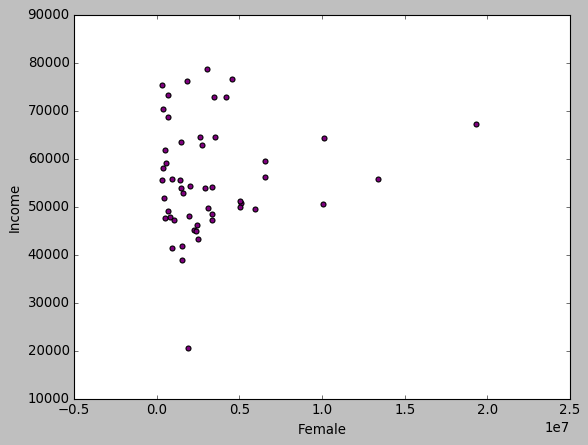

In [240]:
the_women_column  = us_census['Female']
the_income_column = us_census['Income']

plt.xlabel('Female')
plt.ylabel('Income')
plt.scatter(x=the_women_column, y=the_income_column, c='purple')
plt.show()

# Plotting histogram for races

In [154]:
us_census.drop_duplicates(inplace=True)

In [155]:
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329
5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239
7,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607,1841615
8,Delaware,926454,8.82,64.63,20.74,0.26,3.27,NaN,61827.98,448413,478041
9,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674,340810
10,lorida,19645772,21.34,59.08,15.17,0.21,2.28,0.05,50690.19,9600009,10045763


#  Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

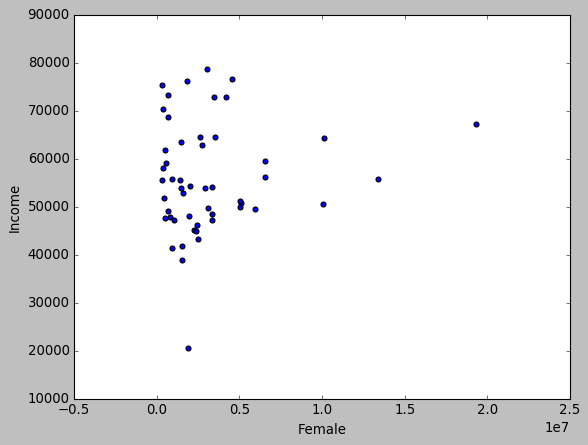

In [241]:
the_women_column  = us_census['Female']
the_income_column = us_census['Income']

plt.xlabel('Female')
plt.ylabel('Income')
plt.scatter(x=the_women_column, y=the_income_column, c='blue')
plt.show()

In [157]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


In [158]:
histogram = round(us_census.loc[:,'Hispanic':'Pacific'].apply (lambda x:x * us_census['TotalPop']/100))

In [159]:
histogram

,Hispanic,White,Black,Native,Asian,Pacific
0,181148.0,2989188.0,1509569.0,21738.0,50722.0,1449.0
1,43342.0,446699.0,20901.0,120200.0,39969.0,7774.0
2,1964018.0,3793869.0,255714.0,289588.0,191288.0,11291.0
3,184001.0,2104469.0,561172.0,15383.0,33724.0,4437.0
4,14327364.0,15453113.0,2182339.0,157528.0,5014001.0,134475.0
5,1096957.0,3689955.0,187401.0,30090.0,140419.0,NaN
7,560543.0,2431893.0,371898.0,4671.0,144448.0,719.0
8,81713.0,598767.0,192147.0,2409.0,30295.0,NaN
9,59374.0,214317.0,335267.0,1295.0,21885.0,194.0
10,4192408.0,11606722.0,2980264.0,41256.0,447924.0,9823.0


In [160]:
histogram.fillna(method='bfill',inplace=True)

In [161]:
histogram.astype(int)

,Hispanic,White,Black,Native,Asian,Pacific
0,181148,2989188,1509569,21738,50722,1449
1,43342,446699,20901,120200,39969,7774
2,1964018,3793869,255714,289588,191288,11291
3,184001,2104469,561172,15383,33724,4437
4,14327364,15453113,2182339,157528,5014001,134475
5,1096957,3689955,187401,30090,140419,719
7,560543,2431893,371898,4671,144448,719
8,81713,598767,192147,2409,30295,194
9,59374,214317,335267,1295,21885,194
10,4192408,11606722,2980264,41256,447924,9823


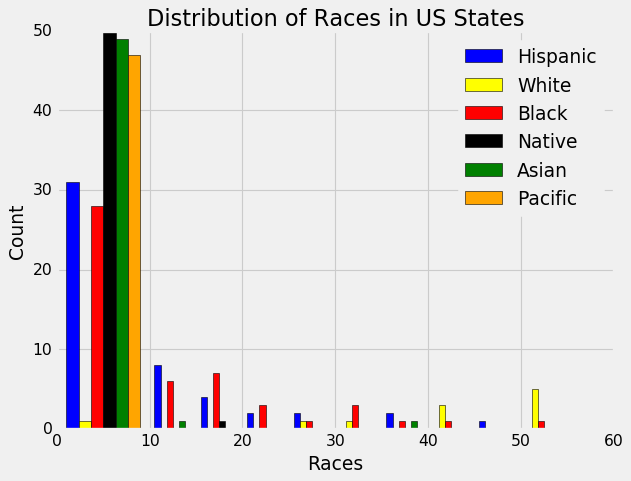

In [196]:
plt.style.use("fivethirtyeight")

hispanicPop = us_census['Hispanic']
whitePop = us_census['White']
blackPop = us_census['Black']
nativePop = us_census['Native']
asianPop = us_census['Asian']
pacificPop = us_census['Pacific']

mybins = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

plt.hist([hispanicPop, whitePop, blackPop, nativePop, asianPop, pacificPop],
         color=['blue', 'yellow', 'red', 'black', 'green', 'orange'],
         label=['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'],
         bins=mybins, edgecolor='black')

plt.title('Distribution of Races in US States')
plt.legend(loc='best')
plt.xlabel('Races')
plt.ylabel('Count')
plt.show()

# PART 2: LEARN DATA ANALYSIS WITH PANDAS, Petal Power Inventory. You’re the lead data analyst for a chain of gardening stores called Petal Power. Help them analyze their inventory!


In [206]:
inventory = pd.read_csv("./inventory.csv")

# Inspect the first 10 rows of inventory.

In [208]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


# The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.

In [218]:
staten_island = inventory.loc[0:9]

In [219]:
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


# A customer just emailed you asking what products are sold at your Staten Island location. Select the column product_description from staten_island and save it to the variable product_request.

In [213]:
product_request = staten_island['product_description']

In [214]:
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [215]:
inventory

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


# Another customer emails to ask what types of seeds are sold at the Brooklyn location.

Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request

In [222]:
seed_request = inventory[(inventory['location']=='Brooklyn') & (inventory['product_type']=='seeds')]

In [223]:
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


# Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.

In [224]:
inventory['in_stock'] = inventory['quantity']>0

In [225]:
inventory

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


# Petal Power wants to know how valuable their current inventory is. Create a column called total_value that is equal to price multiplied by quantity.


In [226]:
inventory['total_value']=inventory['price']*inventory['quantity']

In [227]:
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00


The Marketing department wants a complete description of each product for their catalog.

The following lambda function combines product_type and product_description into a single string:

combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)

In [229]:
combine_lambda = lambda row:'{} - {}'.format(row.product_type, row.product_description)

# Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.

In [230]:
inventory['full_description'] = inventory.apply(combine_lambda, axis=1)

In [231]:
inventory['full_description']

0                            seeds - daisy
1                       seeds - calla lily
2                           seeds - tomato
3                      garden tools - rake
4               garden tools - wheelbarrow
5                     garden tools - spade
6             pest_control - insect killer
7               pest_control - weed killer
8     planter - 20 inch terracotta planter
9         planter - 8 inch plastic planter
10                           seeds - daisy
11                      seeds - calla lily
12                          seeds - tomato
13                     garden tools - rake
14              garden tools - wheelbarrow
15                    garden tools - spade
16            pest_control - insect killer
17              pest_control - weed killer
18    planter - 20 inch terracotta planter
19        planter - 8 inch plastic planter
20                           seeds - daisy
21                      seeds - calla lily
22                          seeds - tomato
23         

In [235]:
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
